# EXPLORATORY DATA ANALYSIS - Terrorism
## Done by - Dilpreet Kaur
## The Sparks Foundation


## Importing the libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#### The data string is of latin1 encoding instead of UTF-8 encoding


In [8]:
df= pd.read_csv("file:////Users/dilpreetkaur/Downloads/globalterrorism.csv", encoding='latin1')
print('Data has been successfully imported')
df.head()

/var/folders/2l/70b311xx5sj43mng_p6stm280000gn/T/ipykernel_56752/1620578852.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("file:////Users/dilpreetkaur/Downloads/globalterrorism.csv", encoding='latin1')


Data has been successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [12]:
df.shape

(181691, 135)

In [13]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [19]:
for i in df.columns:
    print(i,end=" ,")

eventid ,iyear ,imonth ,iday ,approxdate ,extended ,resolution ,country ,country_txt ,region ,region_txt ,provstate ,city ,latitude ,longitude ,specificity ,vicinity ,location ,summary ,crit1 ,crit2 ,crit3 ,doubtterr ,alternative ,alternative_txt ,multiple ,success ,suicide ,attacktype1 ,attacktype1_txt ,attacktype2 ,attacktype2_txt ,attacktype3 ,attacktype3_txt ,targtype1 ,targtype1_txt ,targsubtype1 ,targsubtype1_txt ,corp1 ,target1 ,natlty1 ,natlty1_txt ,targtype2 ,targtype2_txt ,targsubtype2 ,targsubtype2_txt ,corp2 ,target2 ,natlty2 ,natlty2_txt ,targtype3 ,targtype3_txt ,targsubtype3 ,targsubtype3_txt ,corp3 ,target3 ,natlty3 ,natlty3_txt ,gname ,gsubname ,gname2 ,gsubname2 ,gname3 ,gsubname3 ,motive ,guncertain1 ,guncertain2 ,guncertain3 ,individual ,nperps ,nperpcap ,claimed ,claimmode ,claimmode_txt ,claim2 ,claimmode2 ,claimmode2_txt ,claim3 ,claimmode3 ,claimmode3_txt ,compclaim ,weaptype1 ,weaptype1_txt ,weapsubtype1 ,weapsubtype1_txt ,weaptype2 ,weaptype2_txt ,weapsubtype2

## Cleaning the Data

In [21]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [23]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [25]:
df.shape

(181691, 19)

In [26]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [27]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [28]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# Data Visualisation

### Sub divided Attacks according to:
-- Year 
-- Region
-- Country
-- City
-- terrorist group
-- attack type 
-- target type


## YEAR 

1.Number of Attacks in each year


In [90]:
attacks=df["Year"].value_counts(dropna=False).sort_values(ascending=False)
attacks.head()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
Name: Year, dtype: int64

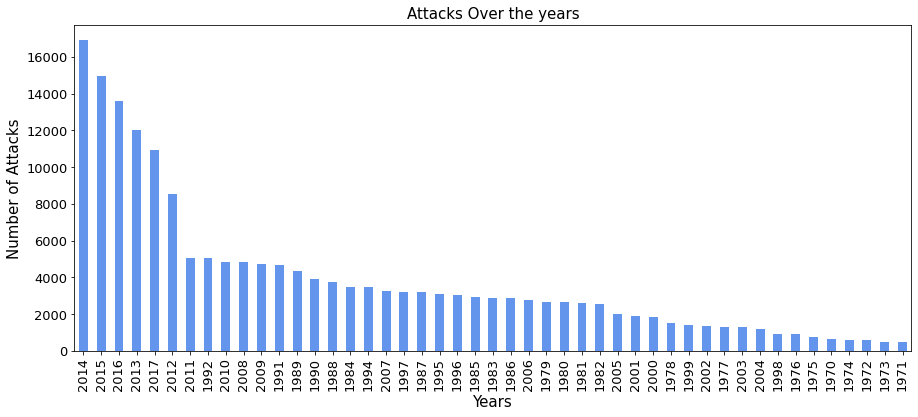

In [123]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Attacks Over the years",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

2. Total Casualties each year

In [48]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


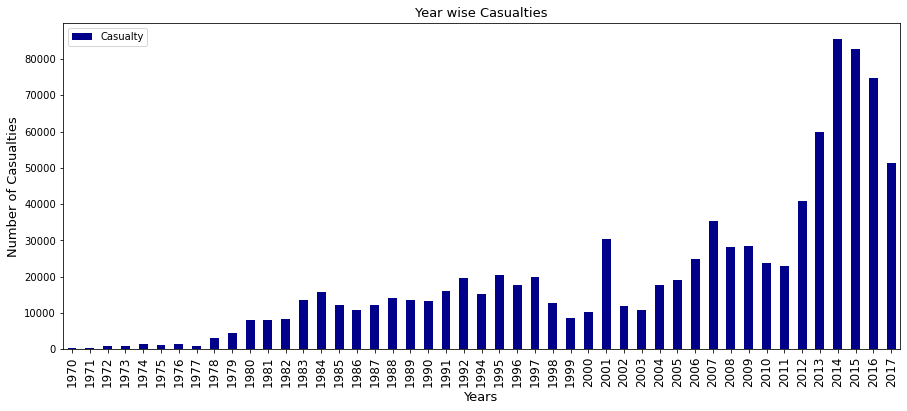

In [121]:
yc.plot(kind="bar",color="darkblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3.Number of people killed in each year

In [51]:
k=df[["Year","Killed"]].groupby("Year").sum()
k.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


4. Number of People Wounded in each year

In [53]:
w=df[["Year","Wounded"]].groupby("Year").sum()
w.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'Number of People Killed')

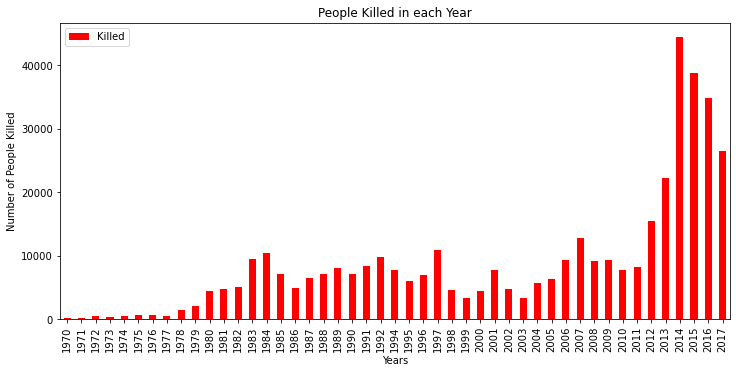

In [71]:
#People killed in each year
fig=plt.figure()
kill=fig.add_subplot(2,1,1)
k.plot(kind="bar",color="Red",figsize=(12,12),ax=kill)
kill.set_title("People Killed in each Year")
kill.set_xlabel("Years")
kill.set_ylabel("Number of People Killed") 


Text(0, 0.5, 'Number of People Wounded')

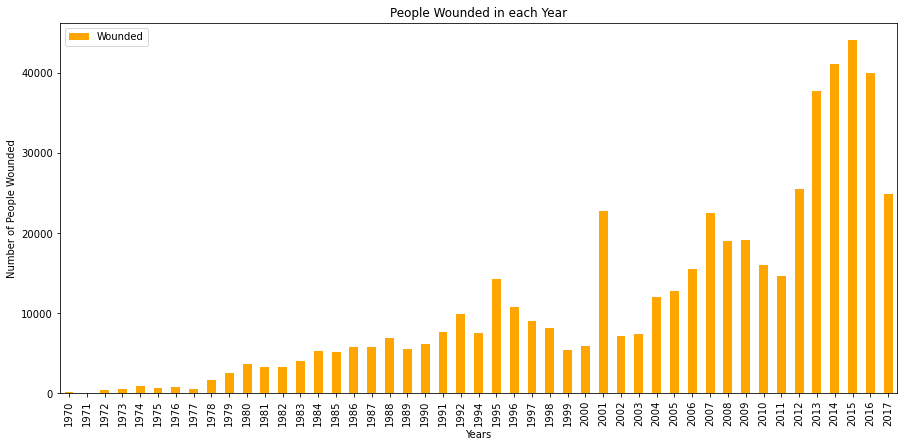

In [83]:
fig=plt.figure()
wound=fig.add_subplot(2,1,1)
w.plot(kind="bar",color="Orange",figsize=(15,15),ax=wound)
wound.set_title("People Wounded in each Year")
wound.set_xlabel("Years")
wound.set_ylabel("Number of People Wounded")


## REGION 

Distribution over region

In [86]:
r=pd.crosstab(df.Year,df.Region)
r.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


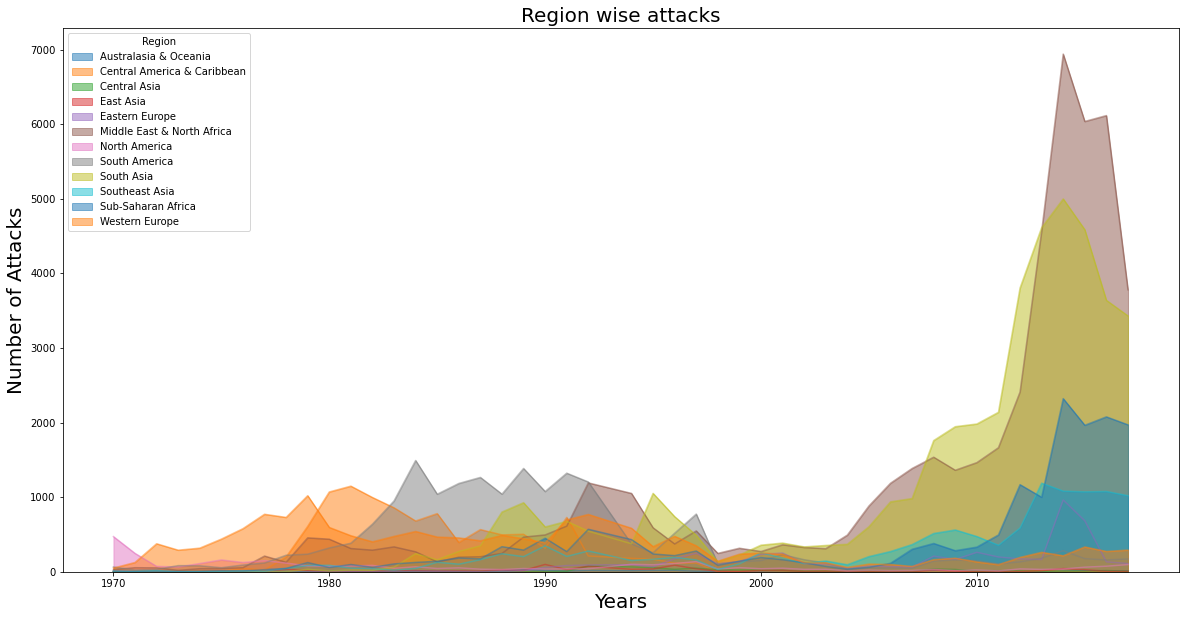

In [94]:
r.plot(kind="area", stacked=False,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

1.Sum Total of Attacks in each Region

In [101]:
tr=df['Region'].value_counts().head(10)
tr

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

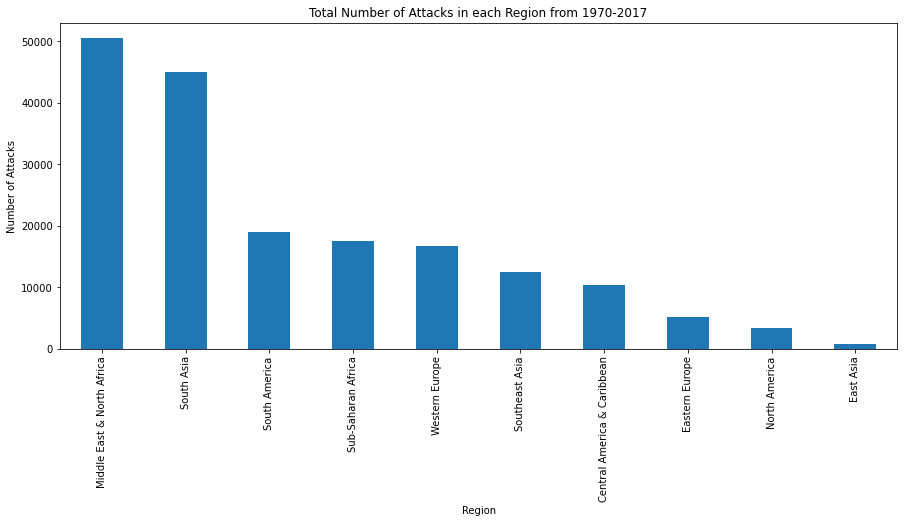

In [102]:
tr.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

2.Casualties in total in each region

In [103]:
trc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
trc

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


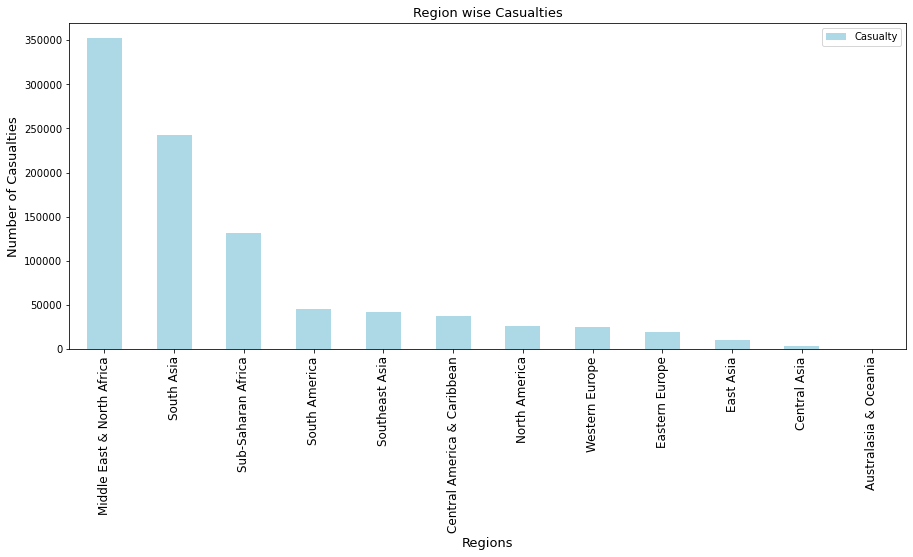

In [108]:
trc.plot(kind="bar",color="LightBlue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

## COUNTRY

In [109]:
#1. NO. OF ATTACKS IN EACH COUNTRY
c=df["Country"].value_counts().head(10)
c

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [115]:
tc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
tc.head(10)

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


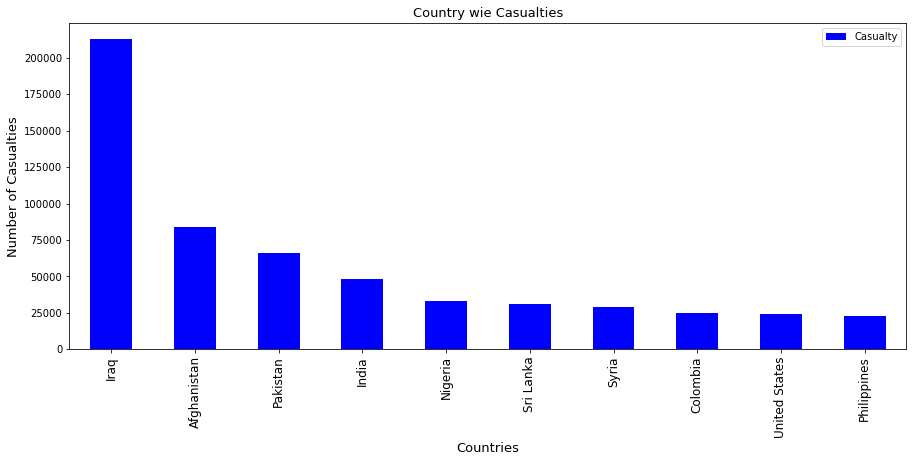

In [113]:
tc[:10].plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

## Terrorist group

1.No. of attacks by each group

In [116]:
g=df["Group Name"].value_counts()[1:10]
g

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

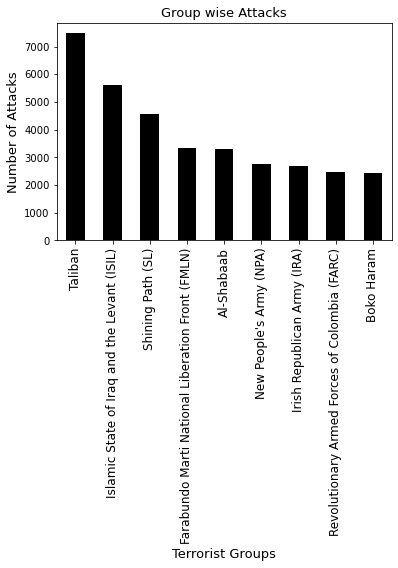

In [117]:
g.plot(kind="bar",color="Black")
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [118]:
tcg=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
tcg.head(10)

,Casualty
Group Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


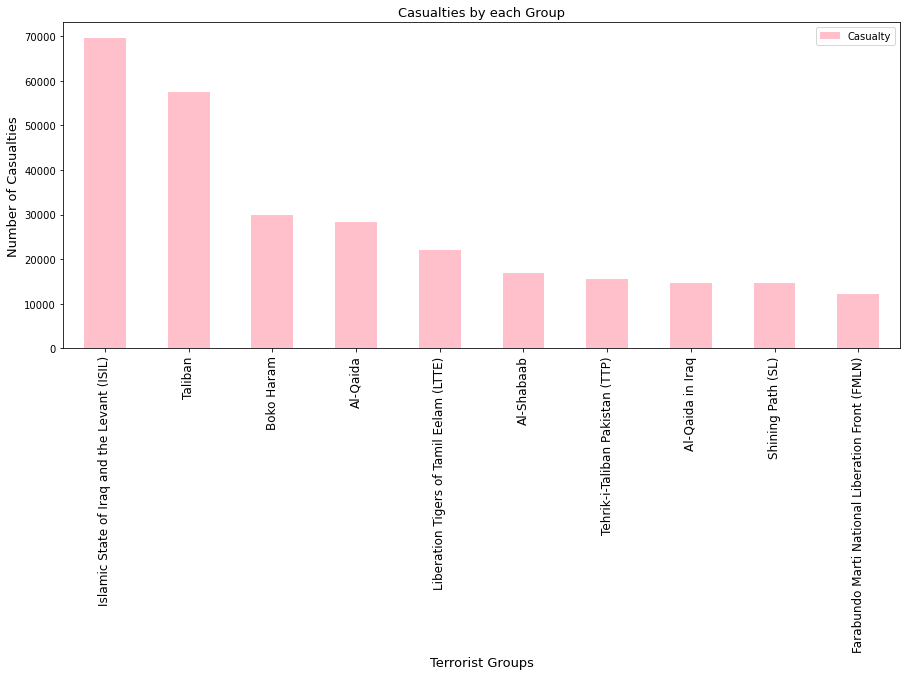

In [120]:
tcg.head(10).plot(kind="bar",color="pink",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

## Attack type

1. Which type of attack was the most?

In [125]:
t=df["Attack Type"].value_counts()
t

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

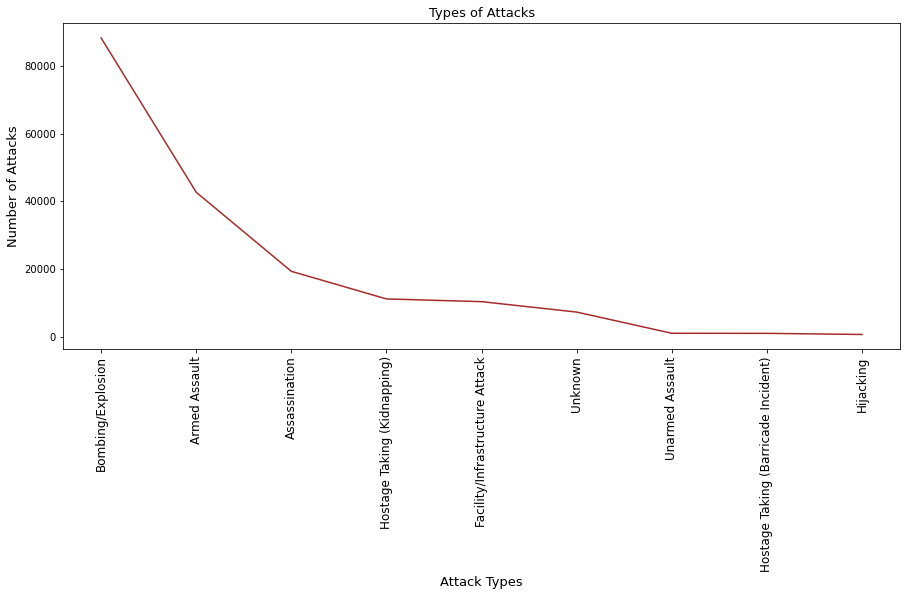

In [130]:
t.plot(kind="line",color="brown",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(rotation = "vertical",size=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. How many casualties occured by each type of attack?

In [131]:
a=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
a

,Casualty
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


In [132]:
a_kill=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
a_kill

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


## Target type

1. On which type of target were the maximum no. of attacks? / No. OF Attacks on each target type

In [133]:
tt=df["Target Type"].value_counts()
tt

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

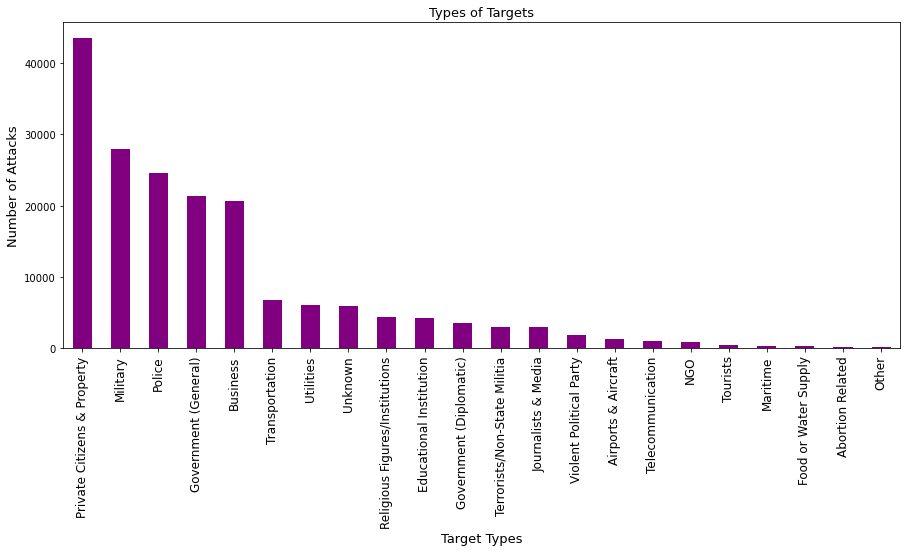

In [139]:
tt.plot(kind="bar",color="purple",figsize=(15,6))
plt.title("Types of Targets",size=13)
plt.xlabel("Target Types",size=13)
plt.xticks(size=12)
plt.ylabel("Number of Attacks",size=13)
plt.show()

In [140]:
cat=df[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)
cat

,Casualty
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


## Total Affected in the world ( 1970 -2017 )

In [145]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks across the world :\n",kill)

Total number of people killed due to Terrorist Attacks across the world :
 411868.0


In [146]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks across the world :\n",wound)

Total number of people killed due to Terrorist Attacks across the world :
 523869.0


# Measures to be Taken 
By reducing access to dangerous weapons

Security should be strengthened across borders

Government should provide more security over countries and be vigilant enough

Government should take measures on increased immigration

education must feature prominently in counter radicalization programs

Working with international partners to share information on terrorism